# Global Power Plant Database project ML


PROBLEM STATEMENT:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


Key attributes of the database

The database includes the following indicators:

1.country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
2.country_long (text): longer form of the country designation
    
3.name (text): name or title of the power plant, generally in Romanized form
    
4.gppd_idnr (text): 10 or 12 character identifier for the power plant
    
5.capacity_mw (number): electrical generating capacity in megawatts
    
6.latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
7.longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
8.primary_fuel (text): energy source used in primary electricity generation or export
    
9.other_fuel1 (text): energy source used in electricity generation or export
    
10.other_fuel2 (text): energy source used in electricity generation or export
    
11.other_fuel3 (text): energy source used in electricity generation or export
    
12.commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
    
13.owner (text): majority shareholder of the power plant, generally in Romanized form
    
14.source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
15.url (text): web document corresponding to the source field
    
16.geolocation_source (text): attribution for geolocation information
    
17.wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
18.year_of_capacity_data (number): year the capacity information was reported

19.generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

20.generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

21.generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

22.generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

23.generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

24.generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

25.generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

26.generation_data_source (text): attribution for the reported generation information

27.estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

28.estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

29.estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

30.estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

31.estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

32.estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

33.estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

34.estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

35.estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

36.estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

In [1]:
#import necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the dataset
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset comprises of 907 observations of 27 columns.

In [3]:
 # first 5 records
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#Last 5 records
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#print the names of all columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Dataset contain 907 rows with 27 columns.
Some of feature are with object datatypes and other with float.

In [7]:
#check null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

lot of null values present in the dataset.

In [8]:
#CHECK duplicates
df.duplicated().sum() 

0

No Duplicate Entry Present in data.

By looking at dataset head,we can see there are lot of data cleaning operation need to done before performing any EDA and ML modelling.

In [9]:
df.drop(columns=["other_fuel1","other_fuel2","other_fuel3",'generation_gwh_2019',   
                 
                 'estimated_generation_gwh','generation_gwh_2013','wepp_id'],axis=1,inplace=True)


In [10]:
#check null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [11]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

we can replace latitude and longitude by mean and median

In [12]:
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [13]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [14]:
#shape of the dataset
df.shape

(907, 20)

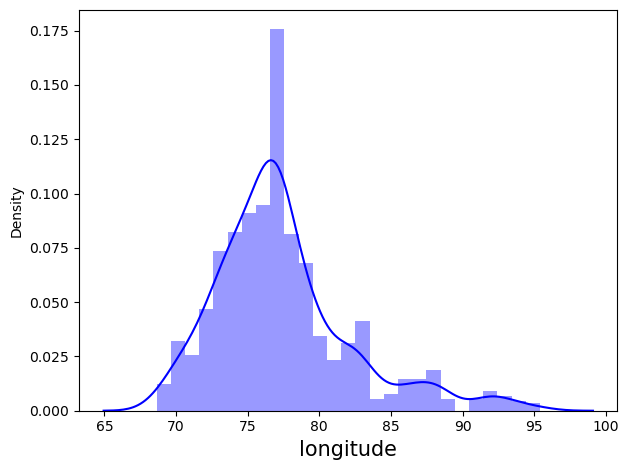

In [15]:
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

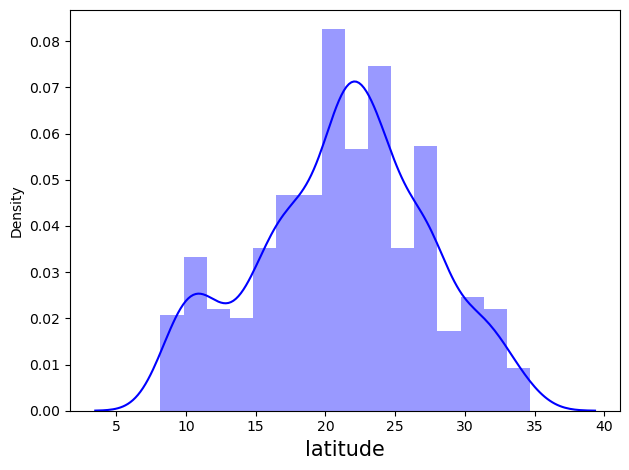

In [16]:
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [17]:
#descriptive statistics of the features(count,mean,min,max etc) 
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Bigest Powerplant has power generation capacity of 4760 MW.
In each Generation-GWHours columns Mean is greater than Median.
Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.

Lets find the power plant with minimum capacity

In [18]:
df.capacity_mw.min()


0.0

Lets find the power plant with maximum capacity

In [19]:
df.capacity_mw.max()

4760.0

In [20]:
df.loc[df.capacity_mw==4760]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,IND,India,VINDH_CHAL STPS,IND0000503,4760.0,24.0983,82.6719,Coal,2002.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


Biggest powerplant in India according to the given dataset is VINDH_CHAL STPS.
Its Power generation capacity of 4760 MW. it is Thermal powerplant with Coal as Primary Fuel 
commission year 2002.

In [21]:
df.loc[df.capacity_mw==0.0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,IND,India,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.0,12.8491,77.6752,Solar,NaN,Tata BP Solar India Limited,Tata BP Solar India Limited,http://www.tatabpsolar.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN


smallest powerplant in India according to the given dataset isTata BP - Electronics City Solar Panel Plant.
it is a solar powerplant with  Primary Fuel as solar.

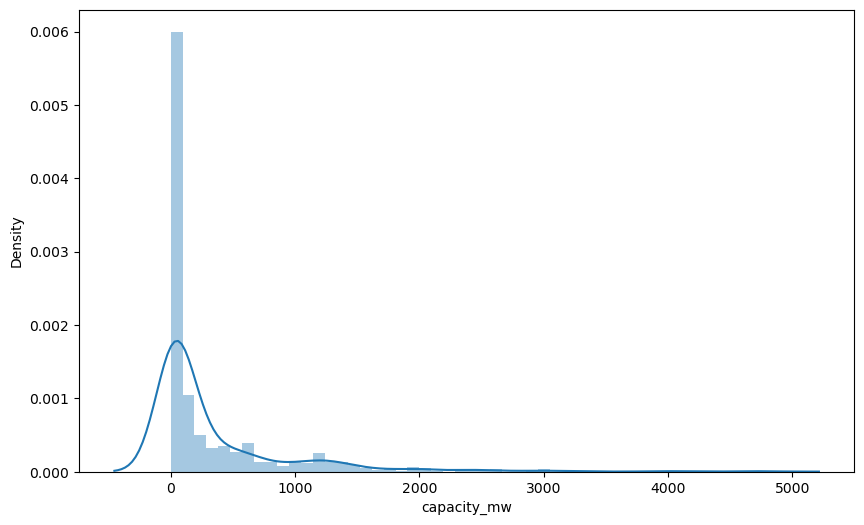

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(df['capacity_mw'])
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

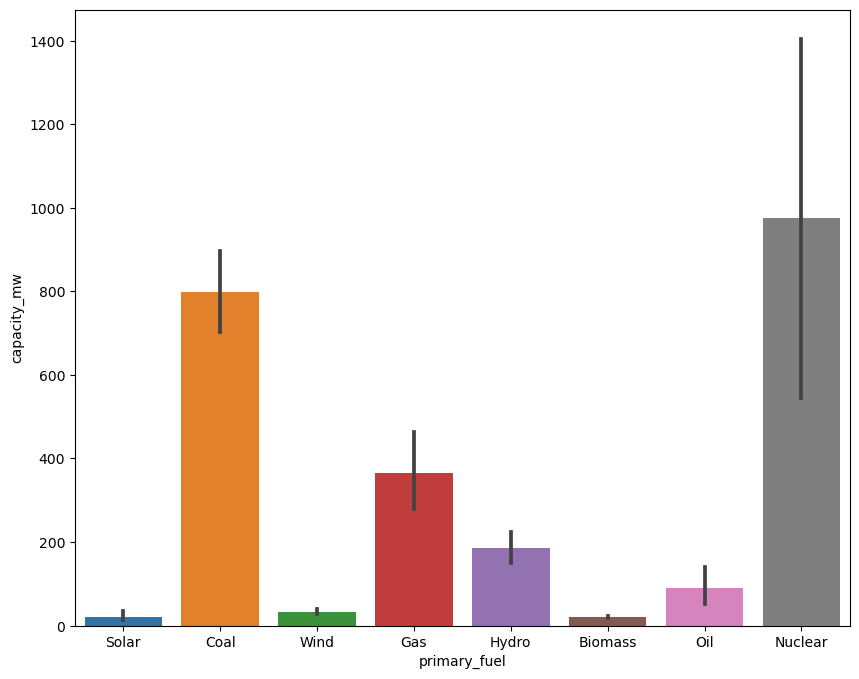

In [23]:
plt.figure(figsize = (10,8))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

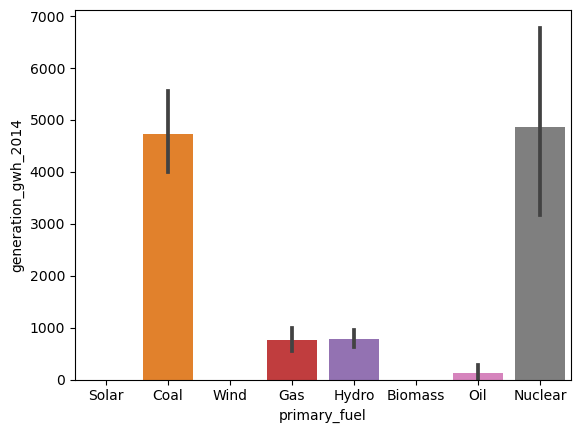

In [24]:
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

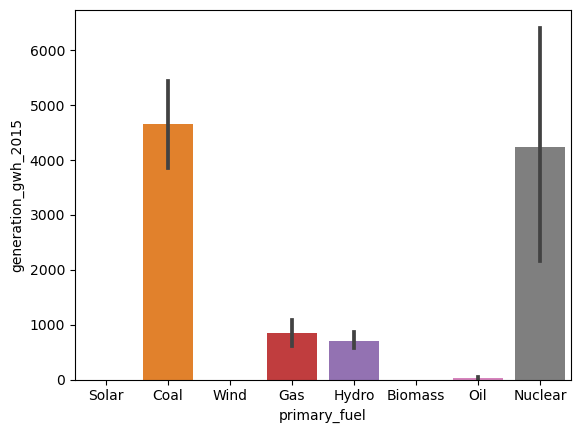

In [25]:
# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)

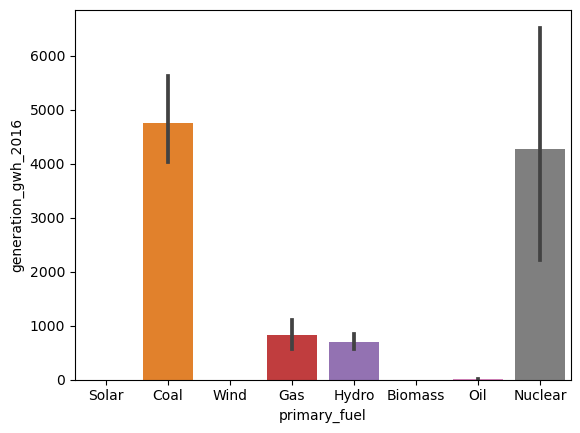

In [26]:
# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)
plt.show()

From all the barplots,
we can see that Nuclear has high mean electrical generation reports
for all the years followed by Coal.

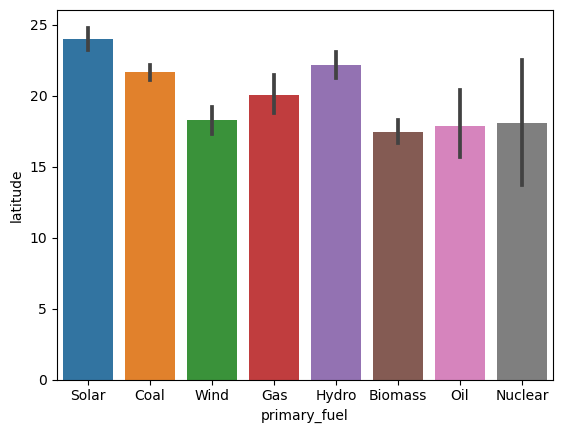

In [27]:
sns.barplot(x='primary_fuel',y='latitude',data=df)
plt.show()

In [28]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

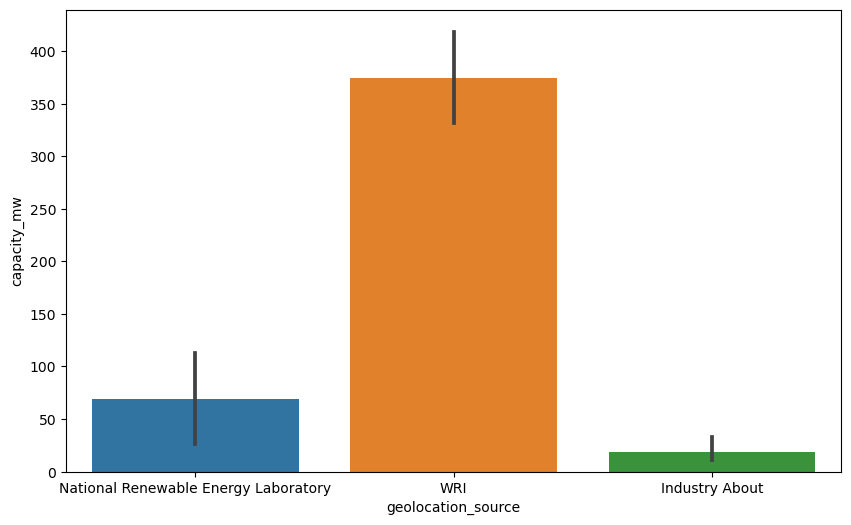

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

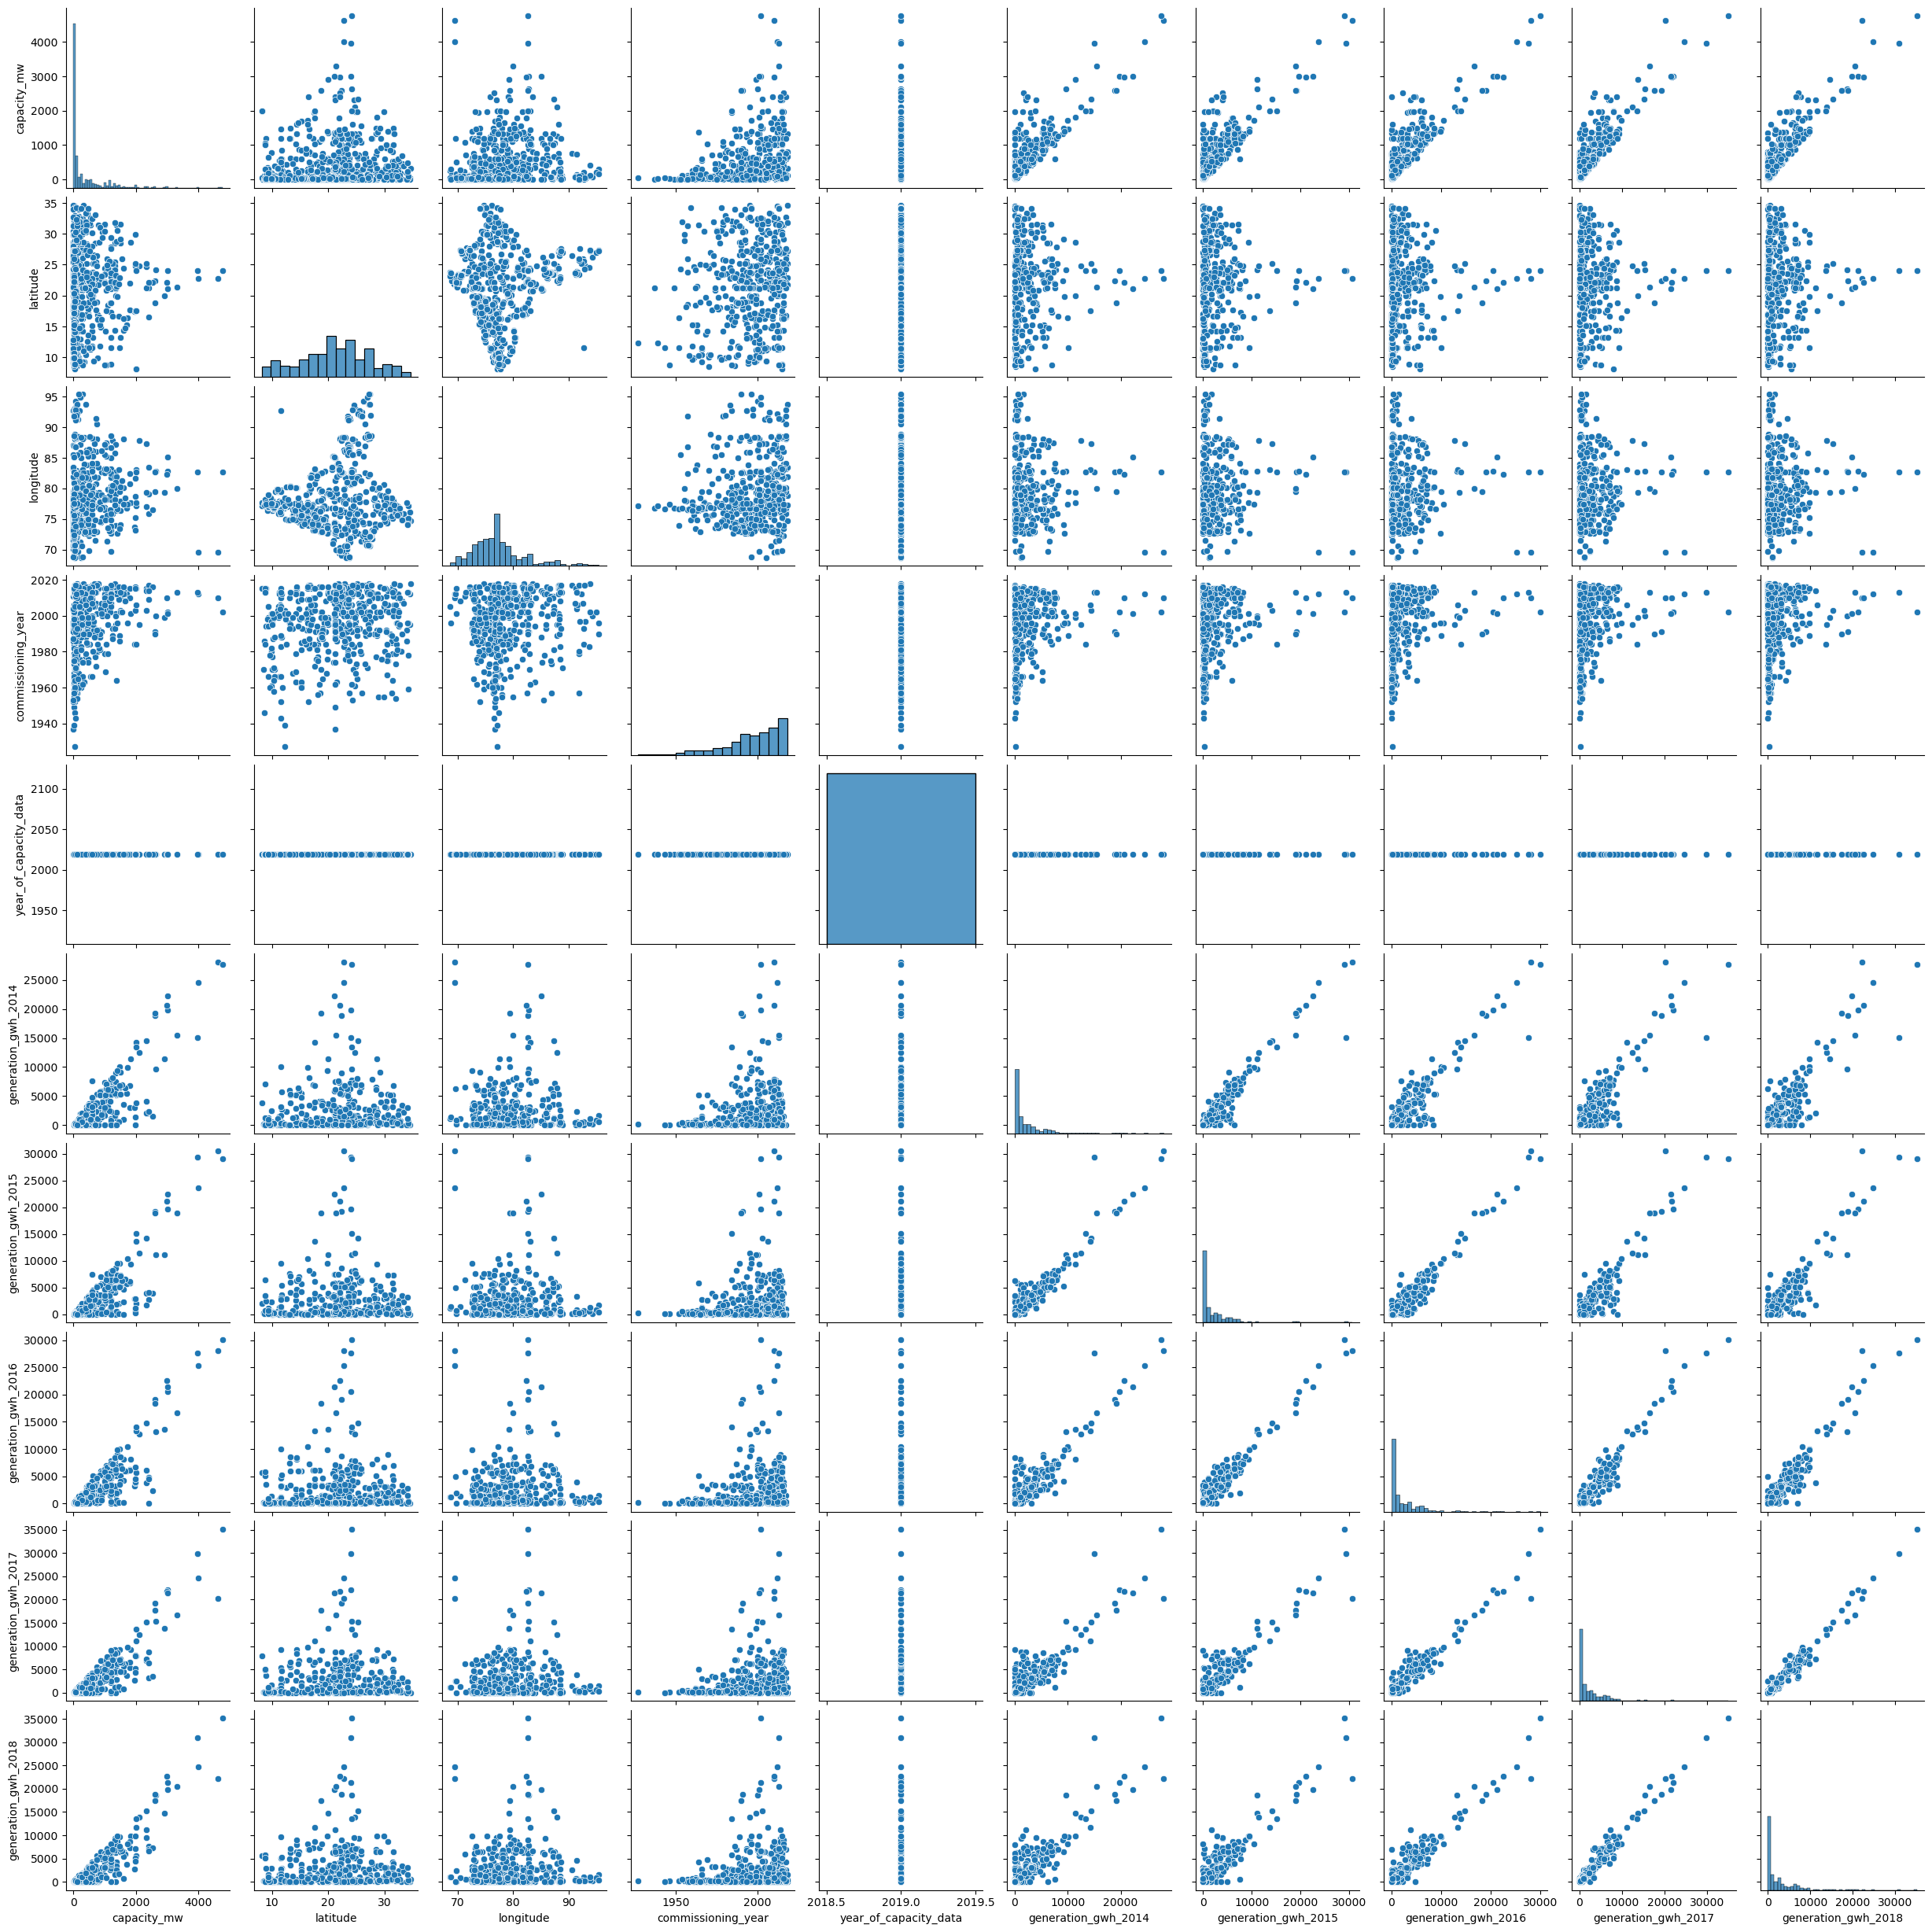

In [30]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

In [31]:
df.drop(columns=['name','country','country_long','gppd_idnr'],axis=1,inplace=True)

In [32]:
df.drop(columns=['owner','source','url'],axis=1,inplace=True)

In [33]:
Category=['primary_fuel','geolocation_source','generation_data_source']
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,98.0,24.7663,74.6090,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,7,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,135.0,23.8712,91.3602,2,2004.0,2,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2015.0,2,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0


In [34]:
df.skew()

capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.163320
primary_fuel              0.472251
commissioning_year       -1.067949
geolocation_source       -2.159841
year_of_capacity_data     0.000000
generation_gwh_2014       3.342707
generation_gwh_2015       3.665904
generation_gwh_2016       3.512370
generation_gwh_2017       3.566070
generation_gwh_2018       3.476298
generation_data_source   -0.019880
dtype: float64

In [35]:
from sklearn.preprocessing import PowerTransformer
skew=['longitude','capacity_mw']
scaler=PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [36]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,longitude,capacity_mw
0,-0.944871,-1.721678
1,-0.532954,0.207805
2,-2.398842,-0.279156
3,2.161404,0.373463
4,1.126190,1.626893


In [46]:
df.skew()

capacity_mw              -0.022185
latitude                 -0.149698
longitude                -0.008414
primary_fuel              0.472251
geolocation_source       -2.159841
generation_data_source   -0.019880
dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [48]:
# Splitting data in target and dependent feature
X = df.drop(['primary_fuel'], axis =1)
Y = df['primary_fuel']

In [40]:
df.drop("generation_gwh_2014",axis=1,inplace=True)
df.drop("generation_gwh_2015",axis=1,inplace=True)
df.drop("generation_gwh_2016",axis=1,inplace=True)
df.drop("generation_gwh_2017",axis=1,inplace=True)
df.drop("generation_gwh_2018",axis=1,inplace=True)
df.drop("year_of_capacity_data",axis=1,inplace=True)
df.drop("commissioning_year",axis=1,inplace=True)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [50]:
X_scale = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (634, 5)
Training target vector size: (634,)
Test feature matrix size: (273, 5)
Test target vector size: (273,)


In [51]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_data_source
0,-1.721678,28.1839,-0.944871,6,1,1
1,0.207805,24.7663,-0.532954,1,2,1
2,-0.279156,21.9038,-2.398842,7,2,1
3,0.373463,23.8712,2.161404,2,2,0
4,1.626893,21.9603,1.126190,1,2,0
...,...,...,...,...,...,...
902,1.573058,16.2949,0.168693,1,2,0
903,-1.638212,12.8932,0.347747,6,0,1
904,-0.512847,15.2758,-0.266924,7,2,1
905,0.101586,24.3500,-0.786838,1,2,1


DECISION TREE CLASSIFIER

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('Accuracy Score of DecisionTreeClassifier', accuracy_score(Y_test, y_pred))

Accuracy Score of DecisionTreeClassifier 0.673992673992674


In [53]:
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))

Confusion matrix : [[ 9  2  0  0  0  0  0  1]
 [ 1 44  3 14  2  3  0  3]
 [ 1  4  4  5  0  3  0  2]
 [ 1 14  6 48  2  2  0  5]
 [ 0  0  0  1  1  0  0  0]
 [ 1  0  1  3  0  3  0  1]
 [ 0  0  0  0  0  0 51  1]
 [ 1  2  0  2  0  1  1 24]]


# Random Forest Classifier

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

In [55]:
print('Accuracy score', accuracy_score(Y_test, y_pred))

Accuracy score 0.7509157509157509


In [56]:
print('confusion matrix',confusion_matrix(Y_test, y_pred))

confusion matrix [[ 7  3  0  1  0  0  0  1]
 [ 1 55  2  5  0  3  0  4]
 [ 0  4  8  6  0  0  0  1]
 [ 2 10  2 56  1  0  0  7]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  2  4  0  3  0  0]
 [ 0  0  0  0  0  0 51  1]
 [ 3  1  0  1  0  0  1 25]]


In [57]:
#Crossvalidation
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier()]
    

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation using ',m)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation using  LogisticRegression()
Score : [0.65384615 0.67582418 0.66298343 0.62983425 0.67403315]
Mean Score : 0.6593042316799224
Std deviation : 0.0167430954196639




Cross Validation using  DecisionTreeClassifier()
Score : [0.68681319 0.70879121 0.6961326  0.6961326  0.74585635]
Mean Score : 0.7067451885131443
Std deviation : 0.020767322095654232




Cross Validation using  RandomForestClassifier()
Score : [0.75824176 0.75824176 0.79005525 0.73480663 0.79558011]
Mean Score : 0.7673851010867585
Std deviation : 0.022527549226196417




In [58]:
#Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.709 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.677 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.661 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.630 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.683 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.685 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.669 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [59]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 25}

In [60]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test, y_pred))

Accuracy Score 0.7582417582417582


# TARGET FEATURE CAPACITY

In [61]:
# Splitting data in target and dependent feature
X = df.drop(['capacity_mw'], axis =1)
Y = df['capacity_mw']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (607, 5)
Training target vector size: (607,)
Test feature matrix size: (300, 5)
Test target vector size: (300,)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:',y_pred)
print('\n')
print('Actual Wins:',Y_test)

Predicted Wins: [ 0.68354724  0.73753055  0.60492516 -0.38280486 -0.75002648  0.83587066
 -0.38229482  0.67607694  0.59908374  0.67574203  0.68422483 -0.47727143
  0.77398604 -0.71037011  0.85741526 -1.23503893  0.63941345  0.77084633
 -0.92158968  0.67795981  0.69865373 -1.13158029  0.57462442  0.63198216
  0.96658418 -0.70752954 -1.12991949 -1.16552105 -1.16038682  0.75013926
  0.66434626 -1.38003859 -1.11389686 -0.65269833 -0.4847652   0.66088599
  0.59729049 -0.39291969  0.76137688 -0.76272827 -1.36716196  0.7782523
 -1.19121392  0.83718053 -1.13002997 -0.48037989  0.58238997 -0.92158968
 -1.11443141  0.81592574  0.65612166  0.75637349  0.58132578  0.82589271
  0.95871501 -0.47760634  0.8579579  -0.34513213 -0.94221414 -1.19117299
 -0.77698145 -0.47887595 -1.19807604 -0.60174472 -0.7590649  -0.60174472
 -0.4940483  -0.33708972 -1.18869618 -0.60174472  0.60160522 -0.64742878
 -0.42751496 -1.2183288   0.79923483 -1.0198709   0.81364734 -0.89495888
  0.79823035 -0.77661384  0.69865373

In [65]:
#Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [66]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

ValueError: Unknown label type: 'continuous'

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print(r2_score(Y_test,y_pred)) 
print('\n')



Mean absolute error : 0.413918376127983
Mean squared error : 0.3035597122764004
Root Mean Squared Error: 0.5509625325522602


0.7070148116047448


